## Forecasting house price in Ashfield 

##### Forecasting the House Price ( $y$ = dependent variable )

In [1]:
# import function and libraries 
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the CSV file into a pandas dataframe
ash_raw = pd.read_csv("ashfield.csv")

## 1. Data Cleansing

In [2]:
print("\033[1m" + "Inspecting data:" + "\033[0;0m")
ash_raw.info()

print("\033[1m" + "\nChecking duplicates data:" + "\033[0;0m")
ash = print(ash_raw.duplicated().value_counts())

print("\033[1m" + "\nRemove duplicates data:" + "\033[0;0m")
ash = ash_raw.drop_duplicates()
print(ash.count())

Inspecting data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Price       1080 non-null   int64
 1   SQFT        1080 non-null   int64
 2   Bedrooms    1080 non-null   int64
 3   Baths       1080 non-null   int64
 4   Age         1080 non-null   int64
 5   Occupancy   1080 non-null   int64
 6   Pool        1080 non-null   int64
 7   Style       1080 non-null   int64
 8   Fireplace   1080 non-null   int64
 9   Waterfront  1080 non-null   int64
 10  DOM         1080 non-null   int64
dtypes: int64(11)
memory usage: 92.9 KB

Checking duplicates data:
False    1067
True       13
dtype: int64

Remove duplicates data:
Price         1067
SQFT          1067
Bedrooms      1067
Baths         1067
Age           1067
Occupancy     1067
Pool          1067
Style         1067
Fireplace     1067
Waterfront    1067
DOM           1067
dtype: int64


## 2. Features Selection

### 2.1 Forecasting the house price based on all independent variables

In [3]:
# 'Price' is the dependent variable
y = ash["Price"].to_numpy()

# These are independent variables that affect the house price
x = ash[["SQFT","Bedrooms","Baths","Age","Occupancy","Pool","Style","Fireplace","Waterfront","DOM"]].to_numpy()

# Create the model
linear_reg = LinearRegression() 

# Give the model some data to fit
linear_reg.fit(x.reshape(-1,10),y)

LinearRegression()

__Estimating parameters__

To estimate the $\beta$ parameters for the dataset analytically, the following formula is used:

<img src="file_formula.png" align="left" width = 200\>

In [4]:
rows = x.shape[0] # cleaned dataset

# Create column of ones and stack it horizontally to calculate the intercept beta0
ones = np.ones((rows,1))
x = np.hstack((ones,x))

# Estimating parameters
betas = np.linalg.inv(x.T @ x) @ x.T @ y

for i in range (11):
    print("beta {}: {:.2f}".format(i,betas[i]))


beta 0: -50298.82
beta 1: 85.17
beta 2: -25033.26
beta 3: 40356.08
beta 4: -440.44
beta 5: 6953.95
beta 6: -1792.86
beta 7: 1060.55
beta 8: -3073.57
beta 9: 56226.11
beta 10: -21.18


__The full model to forecast the house price is:__

$y$ = - 50,298.82 + 85.17 SQFT - 25,033.26 Bedrooms + 40,356.08 Baths - 440.44 Age + 6,953.95 Occupancy - 1,792.86 Pool + 1,060.55 Style - 3,073.57 Fireplace + 56,226.11 Waterfront - 21.18 DOM + $\varepsilon$


### 2.1.1 Full Model Evaluation

In [5]:
'''
To evaluate the model,
I break the data into a training set (used to fit the model) and
a test set (unsenn samples to evaluate the full model)

''' 
from sklearn.model_selection import train_test_split

# To calculate the MSE (The average squared difference between predicted and true value)
from sklearn.metrics import mean_squared_error as mse

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state = 1)

# Build the regression model
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train) 

# Predict on the test data
y_pred = linear_reg.predict(x_test)

# Calculate the MSE
test_mse = mse(y_pred,y_test)
print("MSE Full Model: {:.2f}".format(test_mse))

MSE Full Model: 5942137891.03


In [6]:
import statsmodels.api as sm

mod = sm.OLS(y_train, x_train)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     108.3
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          1.11e-129
Time:                        00:28:17   Log-Likelihood:                -8084.4
No. Observations:                 640   AIC:                         1.619e+04
Df Residuals:                     629   BIC:                         1.624e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.068e+04   2.06e+04     -1.002      0.3

#### Conclusion:
The full model has high Mean Squared Error. Hence, to reduce the MSE and produce more accurate model, I reduce the model by excluding independent variables that the most insignificant. In this case, the independent variables that have __p-value > 0.05 are removed__.

### 2.2 Forecasting the house price based on 4 significant independent variables

In [7]:
# 'Price' is the dependent variable
y = ash["Price"].to_numpy()

# These are independent variables that affect the house price
xnew = ash[["SQFT","Bedrooms","Baths","Age"]].to_numpy()

rows = xnew.shape[0] # 1067 rows

# Create column of ones and stack it horizontally to calculate the intercept beta0
ones = np.ones((rows,1))
xnew = np.hstack((ones,xnew))

# Estimating parameters
betas = np.linalg.inv(xnew.T @ xnew) @ xnew.T @ y

for i in range (5):
    print("beta {}: {:.2f}".format(i,betas[i]))

beta 0: -30708.32
beta 1: 87.32
beta 2: -28302.06
beta 3: 42004.71
beta 4: -545.71


#### The reduced model to forecast the house price is:

$y$ = -30,708.32 + 87.32 SQFT - 28,302.06 Bedrooms + 42,004.71 Baths - 545.71 Age + $\varepsilon$

### 2.2.1 Reduced Model Evaluation

In [8]:
# Train-test split
xnew_train, xnew_test, y_train, y_test = train_test_split(xnew, y, test_size=0.4, random_state = 1)

# Build the regression model
linear_reg = LinearRegression()
linear_reg.fit(xnew_train,y_train) 

# Predict on the test data
y_pred = linear_reg.predict(xnew_test)

# Calculate the MSE
test_mse = mse(y_pred,y_test)
print("MSE Reduced Model: {:.2f}".format(test_mse))

MSE Reduced Model: 5909493495.01


In [9]:
# Regression result for reduced model

mod_new = sm.OLS(y_train, xnew_train)
res_new = mod_new.fit()
print(res_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     247.3
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          6.07e-128
Time:                        00:28:17   Log-Likelihood:                -8104.3
No. Observations:                 640   AIC:                         1.622e+04
Df Residuals:                     635   BIC:                         1.624e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1084.4444   1.65e+04     -0.066      0.9

#### Conclusion:
The MSE for reduced model is lower than the full model and all the independent variables have p-value < 0.05 and there is no 0 included in the confidence interval.
Hence, there is sufficient evidence to show that reduced model is better.

## 3. Data Visualisation

### 3.1 SQFT Vs House Price

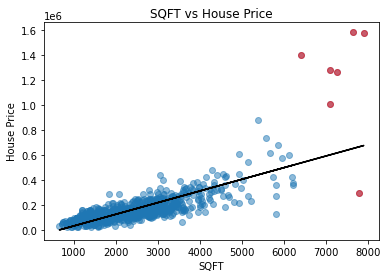

In [10]:
plt.scatter(ash["SQFT"], ash["Price"], alpha = 0.5)
outlier = ash.query("SQFT > 6300")
plt.scatter(outlier["SQFT"], outlier["Price"], alpha = 0.5, c = 'red')

m,b = np.polyfit(ash["SQFT"], ash["Price"],1)
plt.plot(ash["SQFT"], m * ash["SQFT"] + b, c = 'black')

plt.xlabel("SQFT")
plt.ylabel("House Price")
plt.title("SQFT vs House Price")
plt.show()

The scatter plot above show that the SQFT and the house price has a positive linear relationship, and there are some datas which are identified as outliers (SQFT more than 6000).

### 3.2 Bedrooms Vs House Price

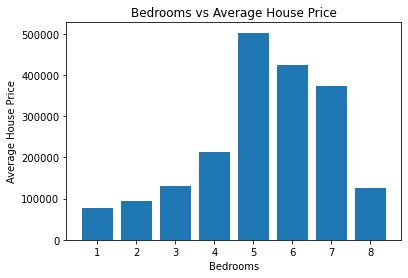

          size           mean
Bedrooms                     
1            5   76800.000000
2          127   93209.157480
3          631  129499.752773
4          278  213526.985612
5           23  502822.695652
6            1  425000.000000
7            1  374000.000000
8            1  125000.000000


In [11]:
avg_bed = ash.groupby("Bedrooms").Price.mean()

xbed = [1,2,3,4,5,6,7,8]
plt.bar(xbed, avg_bed)
plt.xlabel("Bedrooms")
plt.ylabel("Average House Price")
plt.title("Bedrooms vs Average House Price")
plt.show()

bedrooms = ash.groupby(["Bedrooms"]).Price.agg([np.size, np.mean])
print(bedrooms)

The dataset only has 1 sample house price information for each 6,7,8 bedrooms. As seen on the table and graph above, the average price of the 6,7,8 bedrooms are lower than the 5 bedrooms' price. This might be possible if the unit does not have any other benefits, such as extremely far from the CBD, overage, huge renovation cost needed, etc.

### 3.3 Baths Vs House Price

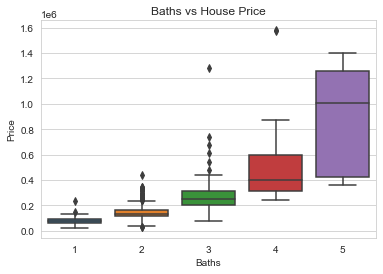

         amin     amax  size           mean
Baths                                      
1       22000   230777   178   77675.466292
2       31900   442500   760  142311.239474
3       74900  1280000   107  277417.345794
4      245000  1580000    17  568641.176471
5      360000  1400000     5  890400.000000


In [12]:
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(ash["Baths"], ash["Price"], data=tips)
plt.title("Baths vs House Price")
plt.show()

baths = ash.groupby(["Baths"]).Price.agg([np.min, np.max, np.size, np.mean])
print(baths)


As seen on the graph and table above, bath and house price also have a positive linear relationship. The more baths a unit has, the house price would be higher.

### 3.4 Age Vs House Price

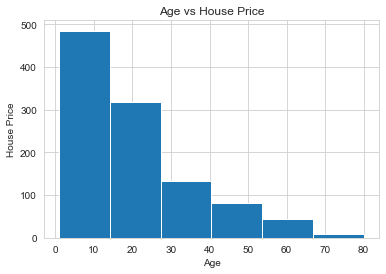

Age Bins


(0.921, 14.167]     485
(14.167, 27.333]    317
(27.333, 40.5]      133
(40.5, 53.667]       81
(53.667, 66.833]     43
(66.833, 80.0]        8
Name: Age, dtype: int64

In [13]:
plt.hist(ash["Age"], bins = 6)
plt.xlabel("Age")
plt.ylabel("House Price")
plt.title("Age vs House Price")
plt.show()

print("\033[1m" + "Age Bins" + "\033[0;0m")
pd.cut(ash["Age"], bins = 6).value_counts().sort_index()

As seen on the histogram above, the older the house, the lower the price. On the other hand, if the house is new, it would be sell in a higher price. These 2 variables have negative linear relationship.

## 4. Alternative Models to Forecast

### 4.1 Linear Regression

In [14]:
# Using linear regression model to predict house price

xnew_test_SQFT = xnew_test[:,1:2].tolist()
xnew_test_Bedrooms = xnew_test[:,2:3].tolist()
xnew_test_Baths = xnew_test[:,3:4].tolist()
xnew_test_Age = xnew_test[:,4:5].tolist()

print("\n" "\033[1m" + "Linear Regression Model Prediction" + "\033[0;0m")
linreg_model_data = pd.DataFrame({"SQFT": xnew_test_SQFT, 
                                  "Bedrooms": xnew_test_Bedrooms, 
                                  "Baths": xnew_test_Baths, 
                                  "Age": xnew_test_Age, 
                                  "Linear_Reg_Price": y_pred})

linreg_model_data['SQFT'] = linreg_model_data['SQFT'].str.get(0)
linreg_model_data['Bedrooms'] = linreg_model_data['Bedrooms'].str.get(0)
linreg_model_data['Baths'] = linreg_model_data['Baths'].str.get(0)
linreg_model_data['Age'] = linreg_model_data['Age'].str.get(0)


print(str(linreg_model_data))


Linear Regression Model Prediction
       SQFT  Bedrooms  Baths   Age  Linear_Reg_Price
0    1588.0       3.0    2.0   5.0     101027.874140
1    2226.0       3.0    2.0   8.0     159098.105744
2    2246.0       3.0    2.0   2.0     165576.079548
3    4834.0       4.0    4.0   1.0     428022.517379
4    1751.0       3.0    2.0   5.0     116449.791758
..      ...       ...    ...   ...               ...
422  2554.0       3.0    2.0  45.0     161852.597458
423  2842.0       4.0    2.0   1.0     192162.001234
424  2923.0       4.0    2.0  13.0     190654.225600
425  1917.0       3.0    2.0  18.0     122219.834741
426  2016.0       3.0    2.0   5.0     141522.234511

[427 rows x 5 columns]


### 4.2 Random Forest Regressor

In [15]:
# Using random forest model to predict house price

from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state = 1)
forest_model.fit(xnew_train, y_train)
forest_model_predictions = forest_model.predict(xnew_test)

print("\n" "\033[1m" + "Forest Model Prediction" + "\033[0;0m")

forest_model_data = pd.DataFrame({"SQFT": xnew_test_SQFT, 
                                  "Bedrooms": xnew_test_Bedrooms, 
                                  "Baths": xnew_test_Baths, 
                                  "Age": xnew_test_Age, 
                                  "Forest_Mod_Price": forest_model_predictions})

forest_model_data['SQFT'] = forest_model_data['SQFT'].str.get(0)
forest_model_data['Bedrooms'] = forest_model_data['Bedrooms'].str.get(0)
forest_model_data['Baths'] = forest_model_data['Baths'].str.get(0)
forest_model_data['Age'] = forest_model_data['Age'].str.get(0)

print(str(forest_model_data) + "\n")


Forest Model Prediction
       SQFT  Bedrooms  Baths   Age  Forest_Mod_Price
0    1588.0       3.0    2.0   5.0     109989.000000
1    2226.0       3.0    2.0   8.0     163004.000000
2    2246.0       3.0    2.0   2.0     167379.860000
3    4834.0       4.0    4.0   1.0     328064.200000
4    1751.0       3.0    2.0   5.0     108726.000000
..      ...       ...    ...   ...               ...
422  2554.0       3.0    2.0  45.0     123566.590000
423  2842.0       4.0    2.0   1.0     167366.066667
424  2923.0       4.0    2.0  13.0     186571.333333
425  1917.0       3.0    2.0  18.0      99571.000000
426  2016.0       3.0    2.0   5.0     137330.000000

[427 rows x 5 columns]



### 4.3 Decision Tree Regressor

In [16]:
# Using random decision tree model to predict house price
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state = 1)
tree_model.fit(xnew_train, y_train)
tree_model_predictions = tree_model.predict(xnew_test)

print("\n" "\033[1m" + "Decision Tree Model Prediction" + "\033[0;0m")

tree_model_data = pd.DataFrame({"SQFT": xnew_test_SQFT, 
                                "Bedrooms": xnew_test_Bedrooms, 
                                "Baths": xnew_test_Baths, 
                                "Age": xnew_test_Age, 
                                "Tree_Mod_Price": tree_model_predictions})

tree_model_data['SQFT'] = tree_model_data['SQFT'].str.get(0)
tree_model_data['Bedrooms'] = tree_model_data['Bedrooms'].str.get(0)
tree_model_data['Baths'] = tree_model_data['Baths'].str.get(0)
tree_model_data['Age'] = tree_model_data['Age'].str.get(0)

print(str(tree_model_data) + "\n")


Decision Tree Model Prediction
       SQFT  Bedrooms  Baths   Age  Tree_Mod_Price
0    1588.0       3.0    2.0   5.0         75000.0
1    2226.0       3.0    2.0   8.0        187400.0
2    2246.0       3.0    2.0   2.0        172000.0
3    4834.0       4.0    4.0   1.0        215000.0
4    1751.0       3.0    2.0   5.0         95000.0
..      ...       ...    ...   ...             ...
422  2554.0       3.0    2.0  45.0        118500.0
423  2842.0       4.0    2.0   1.0        155615.0
424  2923.0       4.0    2.0  13.0        182000.0
425  1917.0       3.0    2.0  18.0         78000.0
426  2016.0       3.0    2.0   5.0        115000.0

[427 rows x 5 columns]



### 4.4 Models Comparison

In [17]:
'''
Random query to see the result from 3 models
    SQFT > 5000
    Bedrooms > 2
    Baths > 2
    Age > 20
'''

# Result from 3 models

print("\n" "\033[1m" + "Linear Regression Model Prediction" + "\033[0;0m")
print(linreg_model_data.sort_values("SQFT").loc[(linreg_model_data['SQFT'] > 5000) 
                                                & (linreg_model_data['Bedrooms'] > 2) 
                                                & (linreg_model_data['Baths'] > 2) 
                                                & (linreg_model_data['Age'] > 20)])

print("\n" "\033[1m" + "Forest Model Prediction" + "\033[0;0m")
print(forest_model_data.sort_values("SQFT").loc[(forest_model_data['SQFT'] > 5000) 
                                                & (forest_model_data['Bedrooms'] > 2) 
                                                & (forest_model_data['Baths'] > 2) 
                                                & (forest_model_data['Age'] > 20)])

print("\n" "\033[1m" + "Decision Tree Model Prediction" + "\033[0;0m")
print(tree_model_data.sort_values("SQFT").loc[(tree_model_data['SQFT'] > 5000) 
                                              & (tree_model_data['Bedrooms'] > 2) 
                                              & (tree_model_data['Baths'] > 2) 
                                              & (tree_model_data['Age'] > 20)])


# Result from the actual dataset
actual_data = ash.query("SQFT == 5736 | SQFT == 5216| SQFT == 7249| SQFT == 6203").sort_values("SQFT")
print("\n" "\033[1m" + "Actual Data" + "\033[0;0m")
print(actual_data.iloc[:,:5])


Linear Regression Model Prediction
       SQFT  Bedrooms  Baths   Age  Linear_Reg_Price
104  5216.0       4.0    3.0  25.0     422126.105729
69   5736.0       4.0    3.0  25.0     471324.861320
255  6203.0       7.0    4.0  25.0     447501.726109
116  7249.0       5.0    5.0  35.0     623655.190980

Forest Model Prediction
       SQFT  Bedrooms  Baths   Age  Forest_Mod_Price
104  5216.0       4.0    3.0  25.0         356543.46
69   5736.0       4.0    3.0  25.0         413136.58
255  6203.0       7.0    4.0  25.0         495630.00
116  7249.0       5.0    5.0  35.0        1417450.00

Decision Tree Model Prediction
       SQFT  Bedrooms  Baths   Age  Tree_Mod_Price
104  5216.0       4.0    3.0  25.0        540000.0
69   5736.0       4.0    3.0  25.0        617000.0
255  6203.0       7.0    4.0  25.0        575000.0
116  7249.0       5.0    5.0  35.0       1280000.0

Actual Data
        Price  SQFT  Bedrooms  Baths  Age
430    230000  5216         4      3   25
432    419900  5736      

### MSE Comparisons Between Models

In [18]:
print("\n" "\033[1m" + "MSE Comparison" + "\033[0;0m")

# Calculate linreg MSE
linreg_mse = mse(y_pred,y_test)
print("MSE Linear Regression Model: {:.2f}".format(linreg_mse))

# Calculate forest MSE
forest_mse = mse(forest_model_predictions,y_test)
print("MSE Random Forest Regressor Model: {:.2f}".format(forest_mse))

# Calculate tree MSE
tree_mse = mse(tree_model_predictions,y_test)
print("MSE Decision Tree Regressor Model: {:.2f}".format(tree_mse))



MSE Comparison
MSE Linear Regression Model: 5909493495.01
MSE Random Forest Regressor Model: 7438997028.43
MSE Decision Tree Regressor Model: 9891580634.72


##### Conclusion:
The best model is Linear regression model (Lowest MSE) and the worst model is Decision tree regressor (Highest MSE)